In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

## 2.1 분류와 회귀

In [2]:
#지도학습 -> 분류, 회귀
#분류: 가능성있는 여러 클래스 레이블중 하나를 예측하는것
#이진분류 or 다중분류로 나뉨

In [3]:
#이진분류 ex) 이메일 스펨분류 (예/아니요 or 양성/음성)
#다중분류 ex) 붓꽃의 예

In [4]:
#회귀: 연속적인 숫자(부동소수점수or 실수) 를 예측하는것 
#회귀 ex) 어떤사람의 교육수준, 나이, 주거지를 바탕으로 연간소득 예측

## 2.2 일반화, 과대적합, 과소적합

In [5]:
#일반화 : 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있을때 말하는것

In [6]:
#과대적합: 가진정보를 모두 사용해서 너무 복잡한 모델을 만드는것
#과소적합: 모델이 너무 간단해서 데이터의 면면과 다양성을 잡지 못하는것

### 2.2.1 모델 복잡도와 데이터셋 크기의 한계

In [7]:
# 큰데이터 -> 복잡한 모델
# but 같은 데이터나 비슷한 데이터를 모으는것 은 도움 x

## 2.3 지도 학습 알고리즘

In [8]:
#특정 알고리즘의 작동방식이 궁금할떄 돌아와서 참고!

### 2.3.1 예제에 사용할 데이터셋

In [9]:
#데이터셋 만들기
X, y = mglearn.datasets.make_forge()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


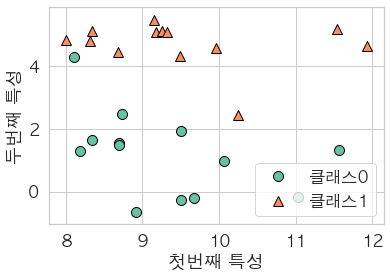

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["클래스0","클래스1"],loc =4)
plt.xlabel("첫번째 특성")
plt.ylabel('두번째 특성')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
print("X.shape:",X.shape)

Text(0, 0.5, '타깃')

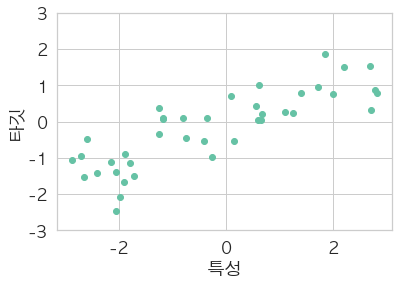

In [11]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [14]:
print("클래스별 샘플 개수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [15]:
print("특성이름:\n", cancer.feature_names)

특성이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
#보스턴 데이터셋 불러오기
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [17]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape",X.shape)

X.shape (506, 104)


### 2.3.2 k-최근접 이웃

In [18]:
#새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터샛에서 가장 가까운 데이터 포인트, 즉 최근접 이웃을 찾는것

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


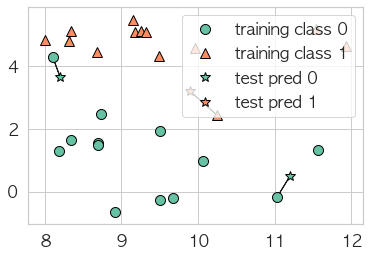

In [19]:
#forge 데이터셋에 대한 1-최근접 이웃 모데르이 에측
mglearn.plots.plot_knn_classification(n_neighbors = 1)

In [20]:
#가장 가까운 이웃이 하나가 아닌 임의의 k를 선택할 수 있다

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


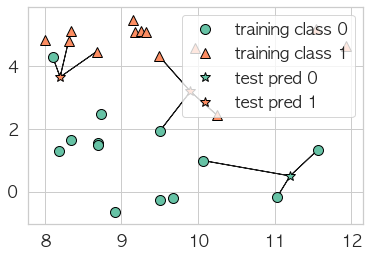

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [22]:
#scikit-learn 을 사용하여 k-최근접 이웃 알고리즘 적용

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [24]:
#KNeighborsClassifier 를 임포트후 객체생성 &매게변수 지정& 이웃수 3으로 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [25]:
#훈련 세트를 사용하여 분류모델을 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
#predict 메서드를 호출하여 사용
print("테스트 세트 예측:",clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [27]:
#모델이 일반화가 잘되었는지 평가하기 위해 score 메서드에 테스트 데이터ㅘ 테스트 레이블 넣어 호출
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


KNeighborsClassifier 분석

In [28]:
#2차원 데잍셋이므로 데이터 포인트의 예츠을 xy평면에 그려볼 수 있음
#클래스0과 클래스1로 지정한 영역으로 나뉘는 "결정경계" 를 볼 수 있음

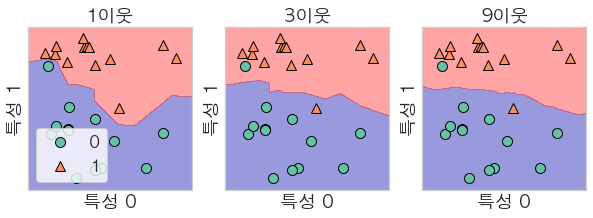

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax =ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)

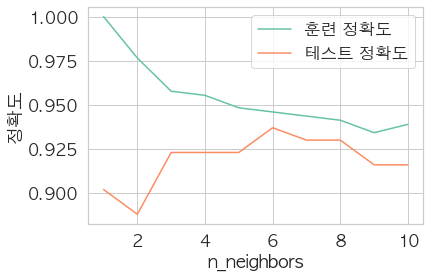

In [30]:
#부드러운 경계는 더 단순한 모델을 의미Z
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify = cancer.target, random_state = 66) # stratify는  target의 class 비율을 유지 한 채로 데이터 셋을 split

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [31]:
#이웃이 너무 작으면 복잡 &이웃이 너무 많으면 너무 단순

k-최근접 이웃 회귀

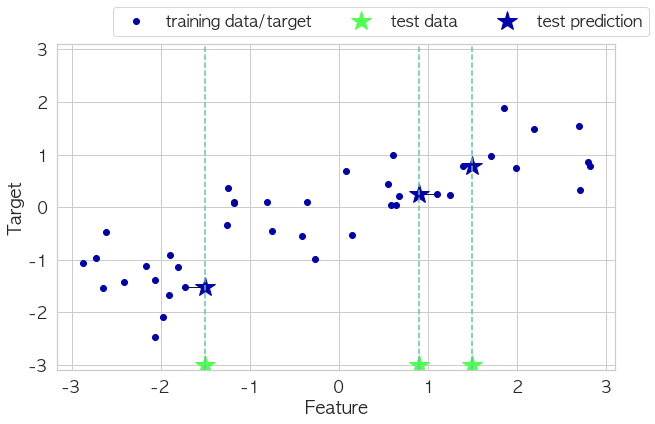

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

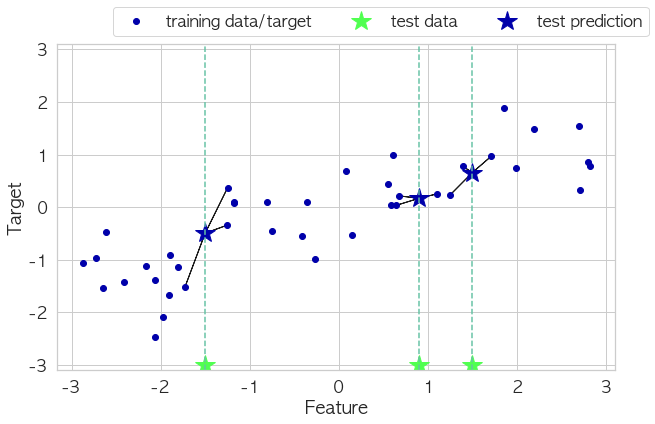

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [34]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [35]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [36]:
#score 메서드애서 회귀일때 R^2 값을 반환한다.
# 결정계수인 R^2값은 회귀모델에서 모델의 적합도를 측정한것(0과 1 사이의값)
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2:0.83


KNeighborsRegressor 분석

In [37]:
#1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있다

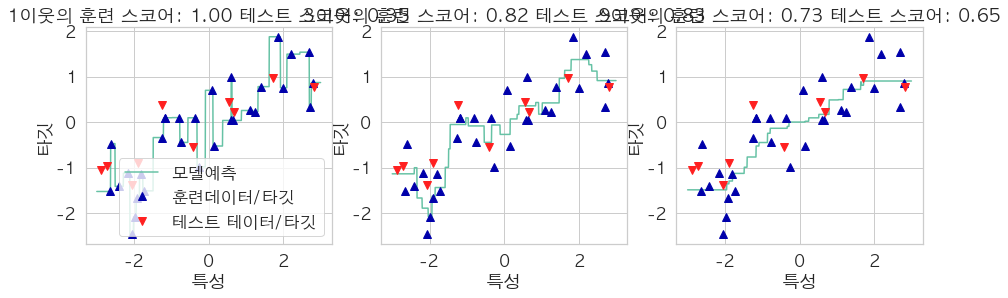

In [38]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3,3,1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^', c=mglearn.cm2(0), markersize =8)
    ax.plot(X_test, y_test,'v', c=mglearn.cm2(1), markersize = 8)
    ax.set_title(
            "{}이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
               n_neighbors, reg.score(X_train, y_train),
               reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(['모델예측','훈련데이터/타깃',
               "테스트 테이터/타깃"],loc = 'best')

In [39]:
#이웃을 하나만 사용할때 훈련세트의 데이터 포인트가 예측에 주는 영양이커 예측값 모두가 훈련데이터를 지나간다 -> 불안정한 예측 
#이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측 가능

장단점과 매개변수

In [40]:
#KNeighbors 분류기에서 가장 중요한 두가지 매개변수는 1.데이터 포인트 사이의 거리를 재는 방법, 2.이웃의 수

In [41]:
#일반적으로 유클리디안 거리를 사용

In [42]:
#K-NN 의 장점은 매우 쉽고 많이 조정하지않아도 좋은 성능을 발휘
#단점은 훈련세트가 크면 예측이 느려짐 and 많은 특성을 가진 데이터 셋에는 잘 작동하지 않음
#그렇기에 현업에서 잘 사용하지 않음

### 2.3.3 선형모델

In [43]:
#선형모델은 입력 특성에 대한 선형 함수를 만들어 예측

회귀의 선형모델

w[0]: 0.393906  b: -0.031804


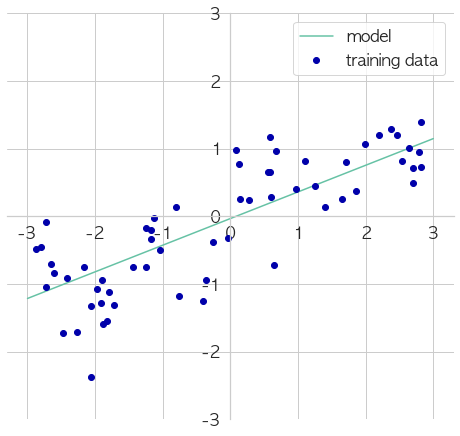

In [44]:
mglearn.plots.plot_linear_regression_wave()

선형 회귀 or 최소 제곱법

In [45]:
#예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차 를 최소화하는 파라미터 w와 b를 찾는것
#선형회귀는 매개변수가 없는것이 장점이지만 모델의 복잡도를 제어할 방법도 없다

In [46]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

lr = LinearRegression().fit(X_train, y_train)

In [47]:
#기울기 파라미더(W)는 '가중치' or '계수'라고 하며 lr 객체의 coef_속성에 저장되어있다
#절편 파라미터(b)는 intercept_ 속성에 저장되어있다

In [48]:
print(lr.coef_)

[0.39390555]


In [49]:
#intercpt_ 속성은 실수값 하나이지만 coef_속성은 각 입력특성에 하나씩 대응되는 numpy배열이다
print(lr.intercept_)

-0.031804343026759746


In [50]:
print(lr.score(X_train, y_train))

0.6700890315075756


In [51]:
print(lr.score(X_test, y_test))

0.65933685968637


In [52]:
#그리 좋은 결과는 아니다 

In [53]:
#보스턴 주택가격 데이터셋에서 테스트하기

In [54]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [55]:
print(lr.score(X_train, y_train))

0.9520519609032729


In [56]:
print(lr.score(X_test, y_test))

0.6074721959665756


리지회귀

In [57]:
#리지회귀에서도  가중치(w)의 선택은 추가제약 조건을 만족시키기 위함도 있음
#모든 w의 원소가 0에 가깝게 되기를 원함(모든 특성이 출력에 주는 영향을 최소화) -> '규제'
#L2규제

In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge().fit(X_train, y_train)
print("훈련세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련세트 점수:0.89
테스트 세트 점수:0.75


In [60]:
#alpha 매게변수로 훈련세트의 성능 댑시 얼마나 단순화 할지 설정 가능
#alpha 값을 높이면 계수 0애 수렴, 성능은 나빠지지만 일반화에 도움을 줌

In [61]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련세트 점수:0.79
테스트 세트 점수:0.64


In [62]:
#alpha 값을 줄이면 계수를 거의 제한하지 않으므로 LinearRegression 과 거의 같아진다
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련세트 점수:{:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(X_test,y_test)))

훈련세트 점수:0.93
테스트 세트 점수:0.77


In [63]:
# alpha = 0.1 이 꽤 좋은 성능

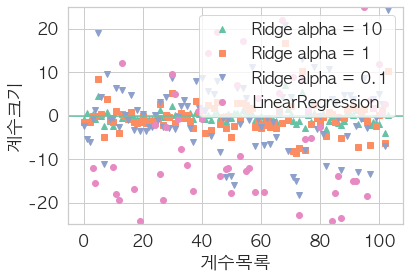

In [64]:
plt.plot(ridge10.coef_,'^',label = 'Ridge alpha = 10')
plt.plot(ridge.coef_,'s',label = 'Ridge alpha = 1')
plt.plot(ridge01.coef_,'v',label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_,'o',label = 'LinearRegression')
plt.xlabel("게수목록")
plt.ylabel("계수크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
# 그림에서 x축은 coef_ 의 원소를 위치대로 나열한것
#alpha 가 10일때 대부분 -3,3 사이에 위치... 등등

In [65]:
#규제의 효과를 이해하는 방법으로 alpha값을 고정하고 훈련데이터이 크기를 변화시켜 보는것
#데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프를 '학습곡선' 이라고 한다

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

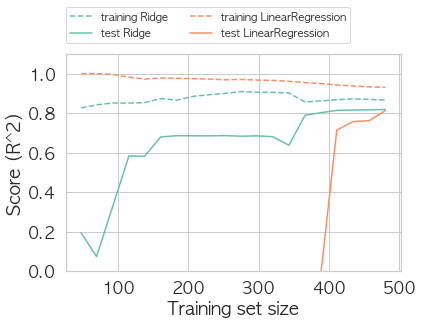

In [66]:
mglearn.plots.plot_ridge_n_samples()

In [67]:
#데이터를 충분히 주면 규제항은 덜 중요해져서 리지회귀와 선형회귀의 성능이 같아질것
#선형회귀의 훈련데이터 성능이 감소한다

라소

In [68]:
#라소도 라지와같이 라소계수를 0에 가깝게 만들고자함
#L1규제
#L1규제를 사용하다보면 어떤항은 0이됌 -> 완전히 제외되는 특성이 생긴다는것

In [69]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso.coef_ != 0 ))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 개수 4


In [70]:
#결과가 좋지는 않음 , 104개의 특성중 4개만 사용
#마찬가지로 계수를 얼마나 강하게 0으로 보낼지 조절하는 alpha 매게변수 지원

In [71]:
#max_iter 기본삾을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso001.coef_ != 0 ))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수 33


In [72]:
#alpha 값을 낮추면 모델의 복잡도는 증가하여 성능은 좋아진다
#그러나 alpha 값을 너무 낮추면 규제의 효과도 없어져 과대적합이므로 LinearRegression 의 결과랑 비슷해짐

In [73]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso00001.coef_ != 0 ))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수 96


Text(0, 0.5, '계수크기')

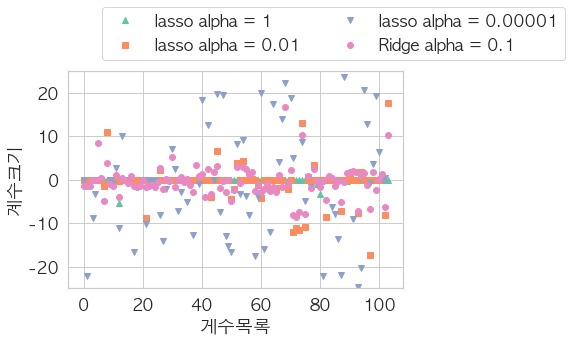

In [74]:
plt.plot(lasso.coef_,'^',label = 'lasso alpha = 1')
plt.plot(lasso001.coef_,'s',label = 'lasso alpha = 0.01')
plt.plot(lasso00001.coef_,'v',label = 'lasso alpha = 0.00001')

plt.plot(ridge.coef_,'o',label = 'Ridge alpha = 0.1')
plt.legend(ncol=2, loc = (0.1,1.05))
plt.ylim(-25, 25)
plt.xlabel("게수목록")
plt.ylabel("계수크기")

In [75]:
#alpha = 0.1 인 Ridge 모델과 alpha = 0.01 인 라소모댈과 성능음 비슷
#그러나 ridge는 어떤계수도 0이 되지않는다
#보통 리지회귀를 더 선호
#sklearn 에서는 lasso와 ridge 의 페널티를 결합한 ElasticNet 제공

ValueError: x and y must have same first dimension, but have shapes (15, 1) and (45,)

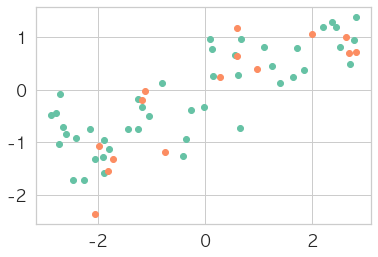

In [76]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

pred_up = QuantileRegressor(quantile = 0.9, alpha = 0.01).fit(X_train, y_train)\
            .predict(X_train)
pred_med = QuantileRegressor(quantile = 0.5, alpha = 0.01).fit(X_train, y_train)\
            .predict(X_train)
pred_low = QuantileRegressor(quantile = 0.1, alpha = 0.01).fit(X_train, y_train)\
            .predict(X_train)

plt.scatter(X_train, y_train, label = '훈련 데이터')
plt.scatter(X_test, y_test, label = '테스트 데이터')
plt.plot(X_test, pred_up, label = '백분위:0.9')
plt.plot(X_test, pred_mid, label = '백분위:0.5')
plt.plot(X_test, pred_low, label = '백분위:0.1')
plt.legend()
plt.show()

# 왜 오류인지 모르겠다

분류용 선형모델

In [77]:
#이진분류를 먼저 살펴보면 예측을 위한 방정식은 선형회귀와 비슷하다
#특성들의 합을 그냥 사용하는 대신 예측값을 임계치 0과 비교한다( 0보다 크면 +! 작으면 -1)
#선형모델을 학습시키는 모델은 다양한데 두가지로 분류
#1.특정계수와 절편의 조합이 훈련데이터에 얼마나 잘 맞는지 측정하는 방법
#2.사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

In [78]:
#가장 널리 알려진 두 개의 선형 분류 알고리즘은 '로지스틱 회귀'와 '서포트 백터 머신' 이다

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


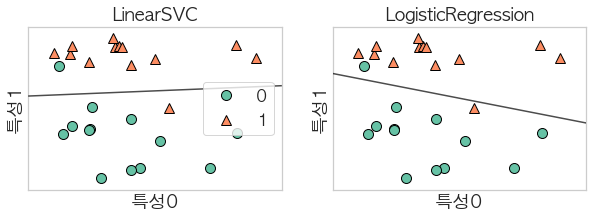

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10,3))

for model , ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf,X,fill = False, eps = 0.5,
                                   ax = ax, alpha =.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel('특성1')
axes[0].legend()

In [80]:
#결정경계로 나누어진다

In [81]:
#보통 두모델은 L2교제를 사용함
#LogisticRegression LinearSVC 에서 규제의 강도를 결정하는것은 C
#C의값이 높아지면 규제는 감소
# -> 알고리즘은 C의값이 낮아지면 데이터 포인트중 다수에 맞추려고하고, 놓아지면 개개의 데이터 포인트를 정확하게 분류하려고함

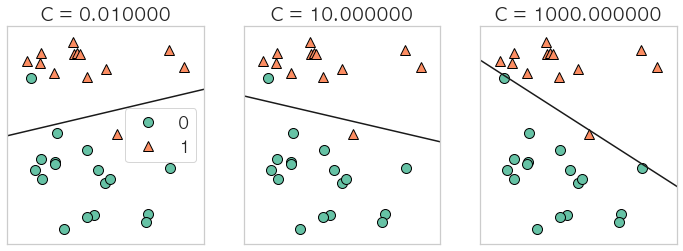

In [82]:
mglearn.plots.plot_linear_svc_regularization()

In [83]:
#맨오른쪽은 잘 분류했지만 과대적합

In [84]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수:0.958
테스트 세트 점수:0.958


In [85]:
#훈련세트와 테스트 세트의 성능이 비슷하므로 과소적합인것 같음
#제약을 풀어주기위해 C의 값을 증가

In [86]:
logreg100 = LogisticRegression(C = 100, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수:0.984
테스트 세트 점수:0.965


In [87]:
#성능이 더 좋아졌다
#규제를 더 강하게 하면 어떻게 되는지 알아보자

In [88]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수:0.953
테스트 세트 점수:0.951


In [89]:
#아미 과소적합된 모델이기에 기본 개개변수일 떄보다 낮아진다

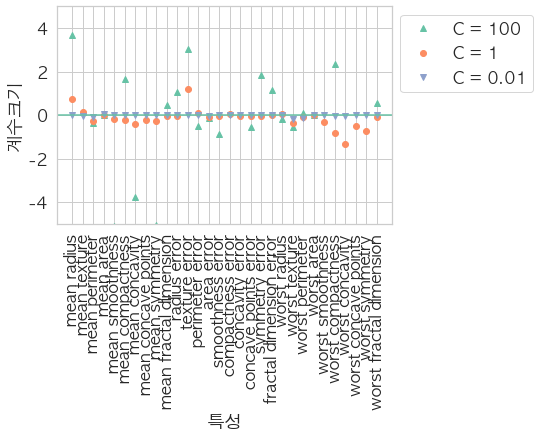

In [90]:
#규제 매개변수 C설정을 세 가지로 다르게 해서 학습시킨 모델의 계수를 확인해보자
plt.plot(logreg100.coef_.T,'^',label = 'C = 100')
plt.plot(logreg.coef_.T,'o',label = 'C = 1')
plt.plot(logreg001.coef_.T,'v',label = 'C = 0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수크기")
plt.legend(loc=2, bbox_to_anchor=(1,1))

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


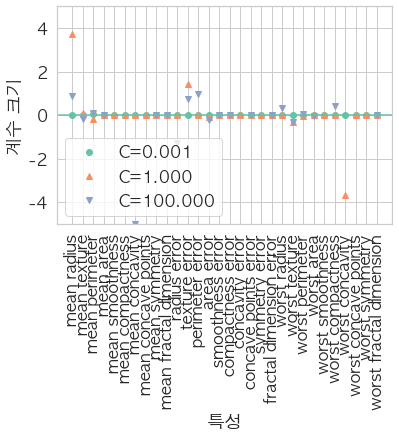

In [91]:
#L1규제를 사용할떄 분류정확도와 계수 그래프
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

다중 클래스 분류용 선형 모델

In [92]:
#로지스틱을 제외한 많은 선형분류 모델은 태생적으로 이진 분류만을 지원한다
#이진분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 '알대다 방법' 이다
#일대다 방법은 각 클래스를 다른 모든 클래스와 구분하도록 이진분류모델을 학습시킨다
#결국 클래스 수만큼 이진분류모댈이 만들어지고 예측할때 모든 이짐분류기가 작동하여 가장높은 점수를 내는 분류기의 클래스를 예측값으로 선택


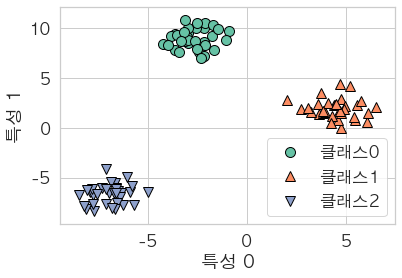

In [93]:
#3개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스0','클래스1','클래스2']);




In [94]:
#이 데이터셋으로 LinearSVC 분류기를 훈련
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기",linear_svm.coef_.shape)
print("절편 배열의 크기",linear_svm.intercept_.shape)

계수 배열의 크기 (3, 2)
절편 배열의 크기 (3,)


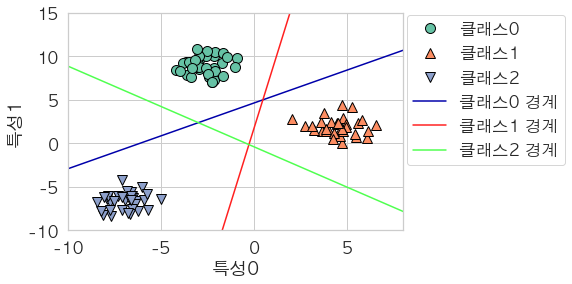

In [95]:
#세개의 일대다 분류기가 만든 결정 경계
mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] +intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0 경계', '클래스1 경계', '클래스2 경계'], loc = (1.01,0.3))

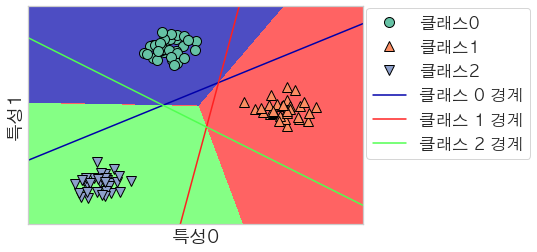

In [96]:
#세 개의 일대다 분류기가 만든 다중 클래스 결정경계
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['클래스0', '클래스1', '클래스2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc = (1.01, 0.3))
plt.xlabel('특성0')
plt.ylabel('특성1');

장단점과 매개변수

In [97]:
#특별히 회귀모델에서 메개변수를 조절하는 일은 매우 중요
#선형 모델은 학습속도가 빠르고 예측도 빠르다. 그리고 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 일어나는지 비교적 쉽게 이해할 수 있다
#하지만 계수의 값들이 왜 그런지 명확하지 않을때가 종종 있다
#선형모델을 샘플에 비해 특성이 많을 때 작동이 잘 된다. 그렇기에 저차원 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다

### 2.3.4 나이브 베이즈 분류기

In [98]:
#앞 선형모델과 매우 유사
#각 특성을 개별로 취급하여 파라미터를 학습하고 각 툭성에서 클래스별 통계를 단순하게 취합
#scikit-learn에는 GaussianNB, BernoulliNB, MultinomialNB 세가지 분류기가 있음
# 각각 순서대로 연속적인데이터, 이진데이터, 카운트데이터 에 적용된다
# BernoulliNB, MultinomialNB 은 보통 텍스트 데이터 분류할떄 사용


In [99]:
#BernoulliNB 분류기는 각 클래스의 특성중 0이 아닌 것이 몇 개인지 센다
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,0],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [100]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print("특성 카운트:\n",counts)

특성 카운트:
 {0: array([0, 1, 0, 1]), 1: array([2, 0, 2, 1])}


장단점과 매개변수

In [101]:
# BernoulliNB, MultinomialNB 는 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다
#alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다
#그러나 alpha에 따른 알고리즘 성능 변동은 비교적 크지않라 alpha 값이 성능향상에 크게 기여하지 않는다
#GaussianNB 은 대부분 고차원 데이터셋에 사용허고 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는데 사용
#모댈의 장단점은 비슷한데 훈현의 예측속도가 빠르고 훈련과정을 이해하기가 쉽다

### 2.3.5 결정트리

In [102]:
#결정트리는 분류와 회귀 문제에 널리 사용하는 모델
#기본적으로 결정에 다다르기 위해 예/아니요 질문을 이어 나가며 학습

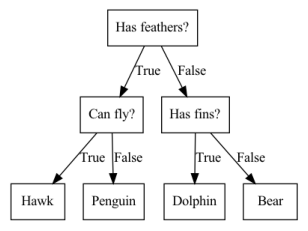

In [103]:
#정답을 담은 네모상자 -> '노드'
#마지막 노드 -> '리프'
mglearn.plots.plot_animal_tree()


결정트리 만들기

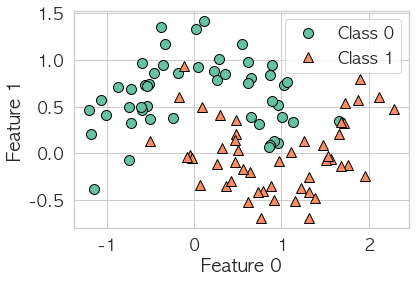

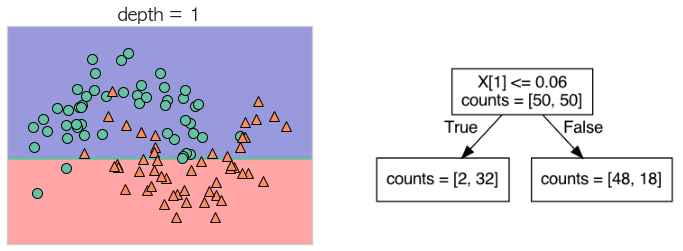

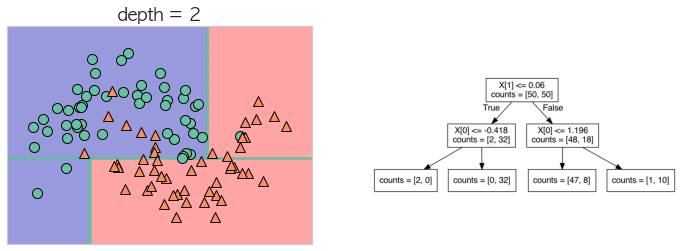

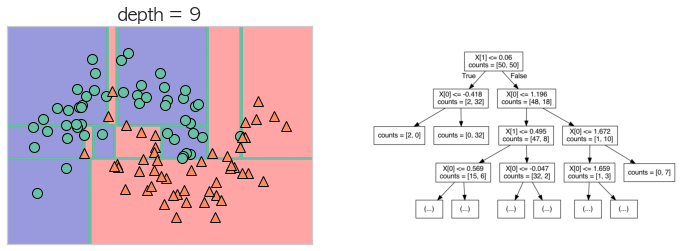

In [104]:
#루트노드 -> 클래스0에 속한 50개 and 클래스1에 속한 50개 모두를 포함한 전체데이터
mglearn.plots.plot_tree_progressive()

결정 트리의 복잡도 제어하기

In [105]:
#일반적으로 트리 만들기를 모든 리프노드가 순수노드가 될 때까지 진행하면 복잡해지고 훈련데이터에 과대적합
#과대적합을 막는 두가지 -> 사전 가지치기 or 사후 가지치기
#리프의 최대깊이 or 최대 개수를 제한 , 노드가 분할하기위한 포인트의 최소개수 지정
#scit-learn 은 사전 가지치기만 지원

In [106]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [107]:
#사전가지치기를 설정 , max-dept = 4 옵션을 주기 (연속된 질문을 최대 4개로 제한)
#트리 깊이를 제한하면 과대적합을 떨어트리며 훈련세트의 정확도는 떨어트리지만 테스트 세트의 성능은 개선
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


결정 트리 분석

In [108]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성','양성'],
               feature_names = cancer.feature_names , impurity = False , filled = True)

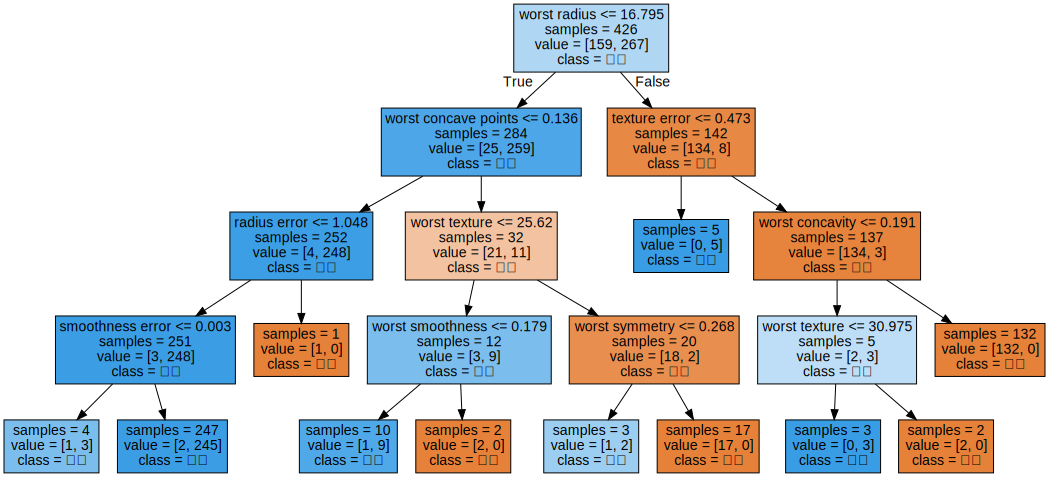

In [109]:
#트리를 시각화하면 알고리즘의 예측을 잘 이해할 수 있음
#트리를 조사할때 많은 수의 데이터가 흐르는 경로를 찾으면 좋다

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

트리의 특성 중요도

In [110]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는것 -> '특성중요도'
#0 과 1 사이의 숫자로 , 0은 전혀사용하지않음, 1은 완변하게 타겟 클래스를 예측
print('특성 중요도:\n',tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


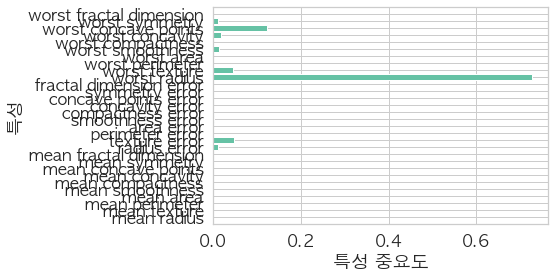

In [111]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [112]:
#첫번째 노드에서 사용한 특성('worst radius')이 가장 중요한 특성으로 나타났다
#선형 모델의 계수와는 달리 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지 알수없다
#중요도 값은 worst radius 가 가장중요하다 알려주지만 높은 반지름이 양성을 악성을 의미하는지 알 수 없다
#특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있으며 다음을 살펴보자

Feature importances: [0. 1.]


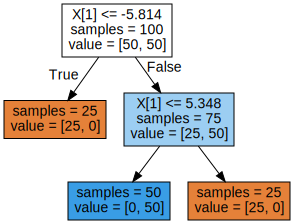

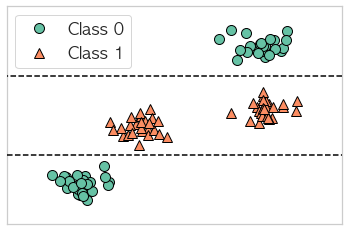

In [113]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, '가격 ($/Mbyte)')

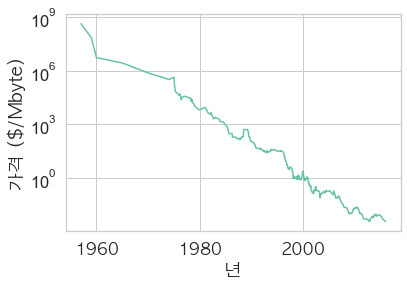

In [114]:
#컴퓨터 메모리 가격 동향 데이터셋을 이용
#x축은 날짜, y축은 해당년도의 1메가바이트당 가격
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

In [115]:
#날짜특성으로 2000년 전까지의 데이터로부터 2000년 이후 가격을 예측해보자
#DecisionTreeRegression 와 LinearRegression 을 비교

from sklearn.tree import DecisionTreeRegressor
#2000년 이전을 훈련데이터 이후를 테스트데이터 만들기
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#가격예측을 위해 날짜 특성만을 이용
X_train = data_train.date.to_numpy()[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 하기위해 로그 스케일로 변환
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌리기
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


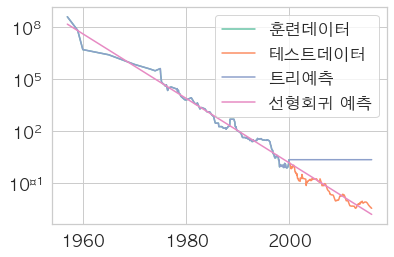

In [116]:
plt.semilogy(data_train.date, data_train.price, label = '훈련데이터')
plt.semilogy(data_test.date, data_test.price, label = '테스트데이터')
plt.semilogy(ram_prices.date, price_tree, label = '트리예측')
plt.semilogy(ram_prices.date, price_lr, label = '선형회귀 예측')
plt.legend()

In [117]:
#선형모델은 직선으로 데이터를 근사하여 테스트 데이터를 잘 예측
#트리모델은 훈련데이터를 완벽하게 예측 but 모델의 범위밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는것이 전부
#트리모델은 훈련데이터 밖의 새로운 데이터를 예측할 능력이 없다

장단점과 매개변수

In [118]:
#결정트리에서 모델 복잡도를 조절하는 매개변수는 트리가 만들어지기전 멈추게하는 사전가지치기 매개변수다
#결정트리 장점: 쉼게 시각화를 할수 있어 이해하기가 쉽다 & 데이터의 스케일에 구해받지 않는다
#결정트리 단점: 사전가지치기를 했음에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다


### 2.3.6 결정 트리의 앙상블

In [119]:
#앙상블이란 여러 머신러닝의 모델을 연결하여 더 강력한 모델을 만드는것
#랜덤 포레스트 와 그레디언트 부스팅 결정트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다|

랜덤 포레스트

In [120]:
#과대적합을 회피할 수 있다
#트리들이 달라지도록 무작위성을 주입
#트리를 만들때 데이터 포인트를 무작위로 선택하는방법& 분할테스트에서 특성을 무작위로 선택하는 방법

렌덤 포레스트 구축

In [121]:
#먼저 생성할 트리의 개수를 정해야 함
#트리들을 독립적으로 만들어야 하므로 각 트리가 고유하게 만들어지도록 무작위한 선택을 함
#데이터의 부트스트랩 샘플 을 생성
#데이터 셋으로 결정트리를 만듬(후보특성 무작워 and 최선의 테스트를 찾음)
#핵심 메게변수는 max_feature 

랜덤 포레스트 분석

In [122]:
#two_moon 데이터셋을 가지고 트리5개의 랜덤 포레스트 모델을 생성해봄
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

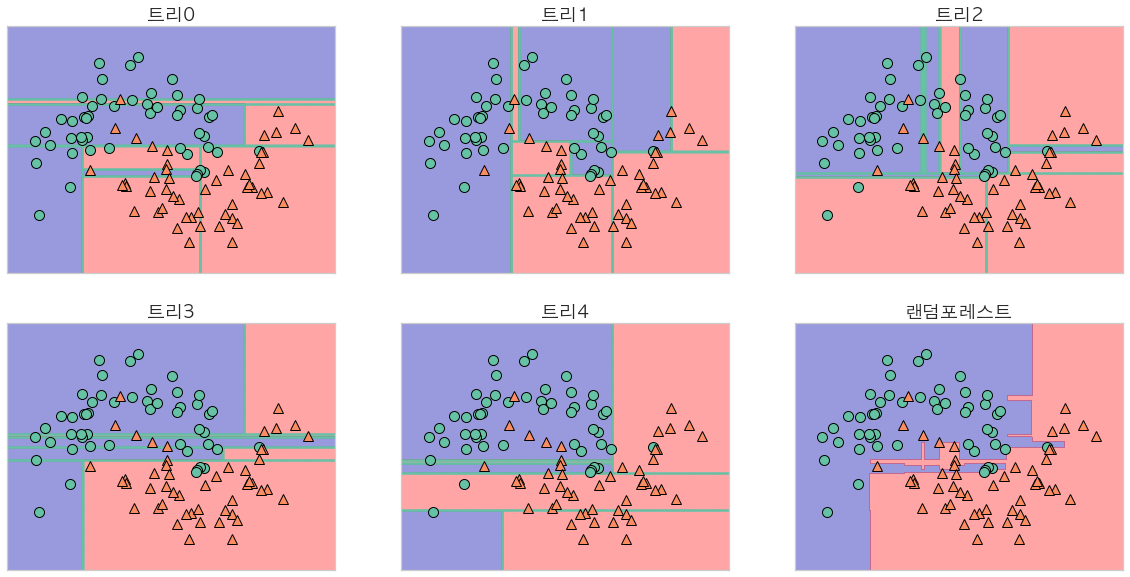

In [123]:
#랜덤포레스트 안에 만들어진 트리는 estimators_ 속성에 저장됨
#시각화 시작
fig, axes = plt.subplots(2, 3, figsize = (20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill= True, ax = axes[-1,-1], alpha= .4)
axes[-1, -1].set_title("랜덤포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1], y)

In [124]:
#다섯개의 트리보다 훨씬 좋은 경계를 만들어 보여줌
#다른 예로 유방암 데이터셋 100개의 트리로이루어진 랜덤 포레스트를 적용
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("훈련테스트 정확도", forest.score(X_train, y_train))
print("테스트 세트 정확도", round(forest.score(X_test, y_test),3))

훈련테스트 정확도 1.0
테스트 세트 정확도 0.972


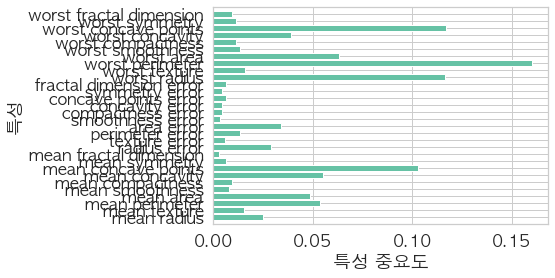

In [125]:
#아무 매개변수 튜닝없이 다른 모델보다 높은 97%정확도를 내고 있다
#아래는 각 트리의 특성 중요도를 취합하여 계산항 값이다
plot_feature_importances_cancer(forest)


In [126]:
#랜덤 포레스트를 만드는 무작위성은 알고리즘이 많은 경우를 고려할 수 있도록 하기 때문에 넓은 시각으로 데이터를 볼 수 있다.

장단점과 매개변수

In [127]:
#매개변수의 큰튜닝 없이 잘 작동한다
#간결하게 표현시 단일트리, 깊게 분석할때 랜덤 포레스트
#cpu 코어 지정가능(n_jobs= 1 ->1 개의 코어사용)
#랜덤이기 때문에 random_state = 지정하지 않으면(혹은 다른 값을 지정하면) 전혀다른 모델


그래디언트 부스팅 회귀 트리

In [128]:
#여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방범

In [129]:
#랜덤포레스트와는 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬
#무작위성이 없으며 대신 강력한 사전 가지치기가 사용
#얖은 트리들을 많이 연결하기에 트리가 많을수록 성능이 좋아짐
#중요 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 learning_rate 이다
#다음은 유방암 데이터셋을 이용해 GradientBoostingClassifier 를 사용한 예시이다

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state= 0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련세트 정확도', gbrt.score(X_train, y_train))
print("테스트 세트 정확도", round(gbrt.score(X_test, y_test),3))

훈련세트 정확도 1.0
테스트 세트 정확도 0.965


In [131]:
#훈련 세트의 정확도가 100%이므로 괴대적합 -> 트리의 최대 깊이를 줄여 사전 가지치기하여 학습률 낮추기

In [132]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print('훈련세트 정확도', round(gbrt.score(X_train, y_train),3))
print("테스트 세트 정확도", round(gbrt.score(X_test, y_test),3))

훈련세트 정확도 0.991
테스트 세트 정확도 0.972


In [133]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print('훈련세트 정확도', round(gbrt.score(X_train, y_train),3))
print("테스트 세트 정확도", round(gbrt.score(X_test, y_test),3))

훈련세트 정확도 0.988
테스트 세트 정확도 0.965


In [134]:
#복잡도를 감소시키며 훈련세트의 정확도가 낮아지고 최대깊이를 낮추는 것은 모델 성능향상에 크게 기여

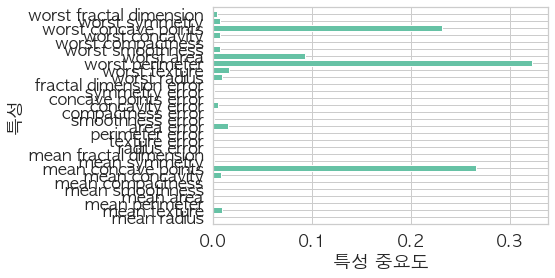

In [135]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [136]:
#랜덤포레스트와는 달리 일부 특성만을 강조
#대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 패키지와 파이썬 인터페이스플 검토해보는 것이 좋음

장단점과 매개변수

In [137]:
#가장 널리 사용되는 강력한 모델중 하나이다
#단점은 매개변수를 잘 조정해야한는 것과 훈련 시간이 길다
#그래디언트 부스팅에 중요 매개변수는 트리의 개수를 지정하는 n_estimators 와 오차를 보정하는 정도를 조절하는 learning_rate이다

### 2.3.7 그 외 다른 앙상블

In [138]:
#skikit-learn 이 제공하는 다른 앙상블 알고리즘인 배깅, 에이다부스트, 엑스트라 트리, 히스토그램 기반 그레디언트 부스팅 에 대해 살펴본다

### 2.3.8 커널 서포트 백터 머신

In [139]:
#입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
#svm 는 분류와 회귀 모두 가능하지만 여기서는 svc를 사용하는 분류만 다룸

선형 모델과 비선형 특성

Text(0, 0.5, '특성 1 ')

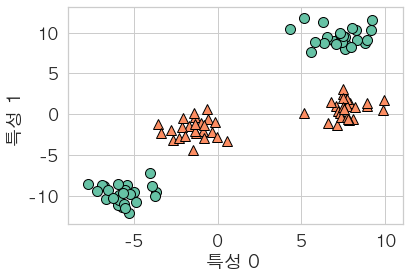

In [140]:
#저차원 데이터셋에서는 선형 모델이 매우 제한적
#선형 모델을 유연하게 만들기 위한 특성중 하나는 특성끼리 곱하거나 거듭제곱을 하는 식으로 새로운 특성을 추가하는 것

X , y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0 ")
plt.ylabel("특성 1 ")

Text(0, 0.5, '특성 1')

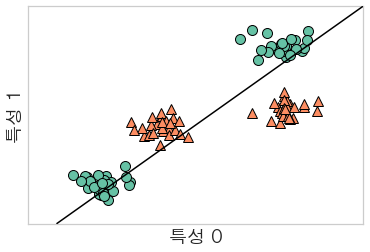

In [141]:
#분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어 이러한 데이터셋에는 잘 들어맞지 않음
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter = 5000, tol = 1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [142]:
import matplotlib

Text(0.5, 0, '특성1 ** 2')

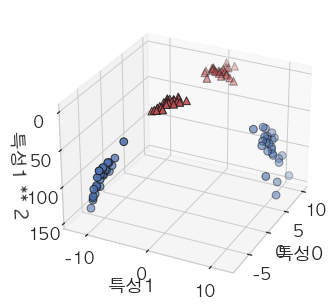

In [143]:
#두 번쨰 특성을 제곱한 특성 1**2를 새로운 특성으로 추가해 확장
#2차원 데이터 포인트 -> 3차원 포인트 확장 | (특성0,특성1) -> (특성0,특성1,특성1**2)

#두 번쨰 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#3차원 그래프
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure = False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

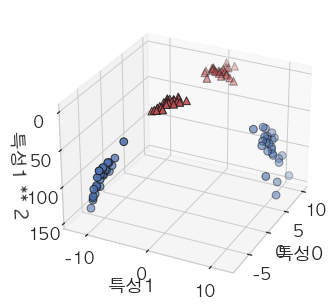

In [144]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

In [145]:
#새로운 데이터셋에서 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있다

Text(0.5, 0, '특성1 ** 2')

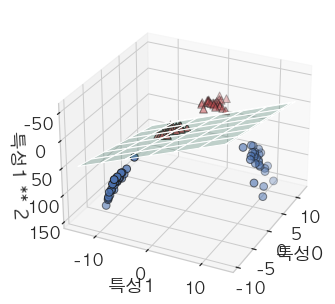

In [146]:
#확장된 데이터셋에서 선형 모델을 만들어 확인

linear_svm_3d = LinearSVC(max_iter= 5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#선형결정경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

In [147]:
#원래 특성으로 보면 이 선형 SVM모델은 더 이상 선형이 아니고 직선보다 타원에 가까운 모습이다

Text(0, 0.5, '특성1')

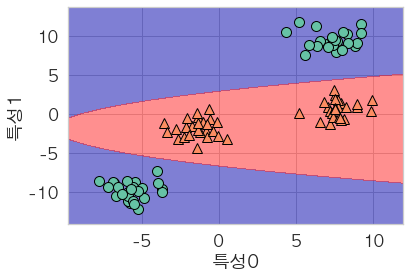

In [148]:
ZZ =YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()],
            cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel("특성1")

커널기법

In [149]:
#어떤 특성을 추가해야할지 모르고 특성을 많이 추가하면 연산비용이 증가한다 
#수학적 기교를 사용하여 새로운 특성을 많이 만들지 않고서 고차원에서 분류기를 학습할수 있음 -> 커널기법
#실제 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산

SVM 이해하기

In [150]:
#두 클래스 사이의 경계에 위치한 데이처 포인트를 서포트 벡터(support vecter) 라 한다
#새로운 데이터 포인트에 대해 예측하려면 각 서포트 백터와의 거리를 측정
#분류결정은 서포트 벡터까지의 거리에 기반하고 서포트 벡터의 중요도는 훈련 과정에서 학습

Text(0, 0.5, '특설 1')

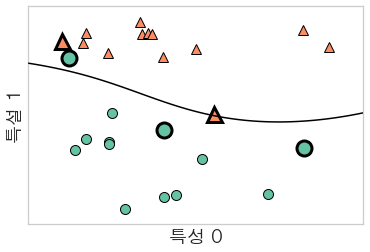

In [151]:
#두 개의 클래스를 가진 2차원 데이터셋에 서포트 백터머신을 학습시키기

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm,X,eps = .5)
#데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv = svm.support_vectors_
#dual_coef_의 부호에의해 서포트 백터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() >0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("특성 0")
plt.ylabel("특설 1")

SVM 매개변수 튜닝

In [152]:
# gamma 매개변수는 Γ로 가우시안 커널 폭의 역수
# gamma 매개변수 하나가 훈련 샘플이 미치는 영향의 범위를 결정
# 작은값은 넓은 영향력, 큰값은 작은 영향력
# C 매개변수는 규제 매개변수, 각 포인트의 중요도를 제한

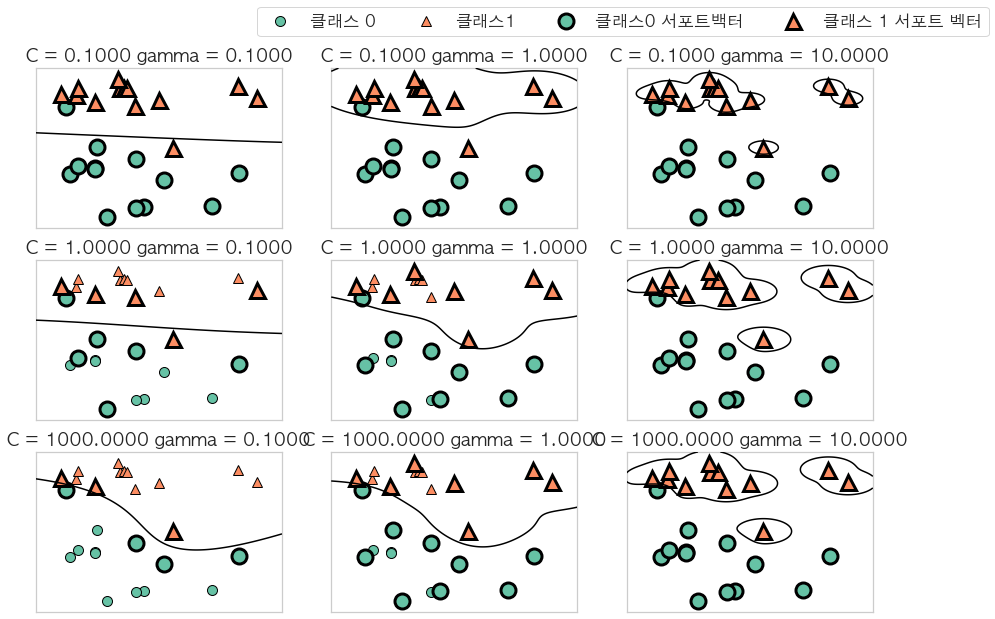

In [153]:
# 매개변수를 다르게 했을때 어떻게 변경되는지 확인

fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)
        
axes[0,0].legend(["클래스 0", "클래스1", "클래스0 서포트백터",
                 "클래스 1 서포트 벡터"], ncol = 4, loc=(.9, 1.2))

In [154]:
# gamma값이 커질수록 하나에 포인트에 더 민감해지는걸 확인
# C 값이 커지면 포인트들이 모델에 큰 영향을 주어 결정경계를 휘어 정확하게 분류

In [155]:
# RBF 커널 SVM을 유방암 데이터셋에 적용해보기
# 기본값 C = 1, gamma = 1/n_feature를 사용

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도", round(svc.score(X_train,y_train),2))
print("테스트 세트 정확도", round(svc.score(X_test,y_test),2))

훈련 세트 정확도 0.9
테스트 세트 정확도 0.94


Text(0, 0.5, '특성크기')

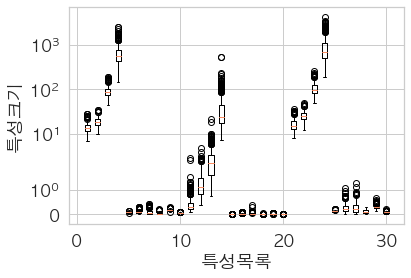

In [156]:
plt.boxplot(X_train, manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("특성목록")
plt.ylabel("특성크기")

SVM 을 위한 전처리

In [157]:
#특설값의 범위가 비슷해지도록 조정하는 것 
#모든 특성값를 평균이 0 이고 단위분산이 되도록 하거나 0괴 1 사이로 맞추는 방법을 사용

In [158]:
#훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis = 0)
#훈련세트에서 특별성 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_train).max(axis = 0)

#훈련데이터에 최소값을 빼고 범위로 나누면 각특성의 최소값0, 최대값 1
X_train_scaled = (X_train - min_on_train) / range_on_training
print("특성별 최소값", X_train_scaled.min(axis = 0))
print("특성별 최대값", X_train_scaled.max(axis = 0))

NameError: name 'min_on_train' is not defined

In [159]:
#테스트 세트에도 같은 작업을 적용하지만 훈련세트에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

NameError: name 'range_on_training' is not defined

In [160]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련세트 정확도", round(svc.score(X_train_scaled, y_train),3))
print("테스트새트 정확도", round(svc.score(X_test_scaled, y_test),3))

NameError: name 'X_train_scaled' is not defined

In [161]:
#데이터의 스케일을 조정해 과소적합 해소
#C 와 gamma 값을 증가시켜 복잡한 모델을 만들어보자

In [162]:
svc = SVC(C = 20)
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도", round(svc.score(X_train_scaled, y_train),3))
print("테스트 세트 정확도",round(svc.score(X_test_scaled, y_test),3))


NameError: name 'X_train_scaled' is not defined

장단점과 매개변수

In [163]:
#저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않는다
#전처리와 매개변수 설정에 신경을 많이 써야 한다
#모델을 분석하기 어렵다
#모든 특성이 비슷한 단위이고(ex. 모든값이 픽셀의 컬러강도) 스케일이 비슷하면 추천
#C 와 gamma 값을 잘 조정해야한다

### 2.3.9 신경망(딥러닝)

In [164]:
#많은 머신러닝 애플리케이션에 딥러닝이 좋은 성과를 보여주고 있고 특정분야에 정교하게 적용되어있을 때가 많다.
#간단하게 분류와 회귀에 쓸수 있는 다층 퍼셉트론(신경망) 을 다룬다

신경망 모델

In [165]:
#MLP 는 여러단계를 걸쳐 만들어내는 선형 모델의 일반화된 모습

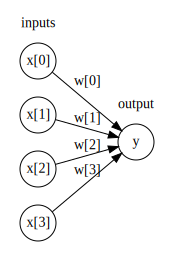

In [166]:
mglearn.plots.plot_logistic_regression_graph()

In [167]:
#왼쪽 노드는 입력특성을 나타내며, 
#연결선은 학습된 계수를 표현하고,
#오른쪽 노드는 입력의 가중치 합, 즉 출력을 나타낸다

In [168]:
#MLP에서는 가중치 합을 만드큰 과정이 여러 반복, 
#중간단계를 구성하는 은닉유닛 을 계산하고 이를 이용하여 결과산출을 위해 가중치 합을 계산

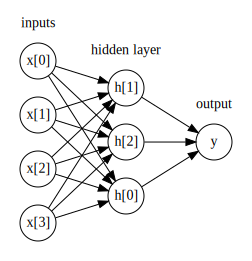

In [169]:
mglearn.plots.plot_single_hidden_layer_graph()

In [170]:
#이런 모델은 많은 계수(혹은 가중치) 를 학습해야 한다
#이 계수는 은닉층의 은닉 유닛 사이, 각 은닉 유닛과 출력 사이마다 있다.
#여러개의 가중치 합을 계산하는 것은 수학적으로보면 하나의 가중치 합을 계산하는 것과 같다
#이 모델을 선형모델보다 강력하게 만들기 위햐서 다른 기교가 필요
#각 은닉 유닛의 가중치 합을 계산한 후 비선형 함수 렐루, 하이퍼블릭 탄젠트 를 적용
#함수 결과의 가중치합을 계산한 후 출력을 만듬

Text(0, 0.5, 'relu(x), tanh(x)')

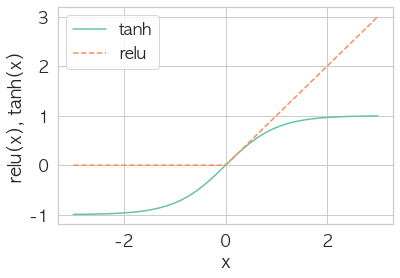

In [171]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle = '--', label = "relu")
plt.legend(loc = "best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

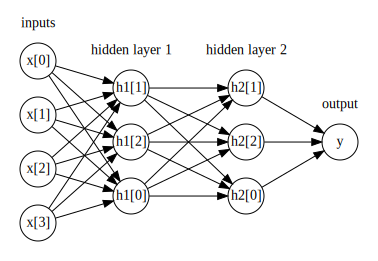

In [172]:
#아래와 같이 은닉층을 추가할 수 있음
mglearn.plots.plot_two_hidden_layer_graph()

In [173]:
#이와같이 많은 은닉층으로 구성된 대규모의 신경망이 생기면서 이를 딥러닝 이라 불림

신경망 튜닝

In [174]:
from sklearn.neural_network import MLPClassifier

Text(0, 0.5, '특성 1')

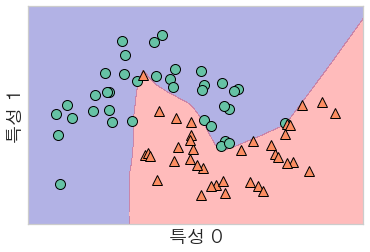

In [175]:
#two_moons 데이터셋에 분류를 위한 MLPClassifier를 적용
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [176]:
#신경망음 비선형적이지만 매끄러운 결정경계를 형성
#은닉의 개수를 줄여도 좋은 결과를 얻을수 있다

Text(0, 0.5, '특성1')

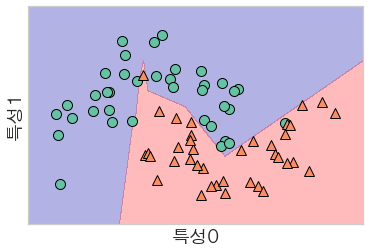

In [177]:
mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes = [10],
                   max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

In [178]:
#은닉 유닛이 10개라 경계가 날카러워졌다
#기본 비선형 함수는 렐루 함수이다
#은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성
#더 매끄러운 결정을 원하면 은닉층을 추가하거나 tanh함수를 사용

Text(0, 0.5, '특성1')

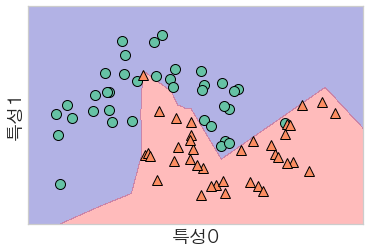

In [179]:
#10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver = 'lbfgs', random_state=0,
                   hidden_layer_sizes = [10, 10], max_iter= 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성 1')

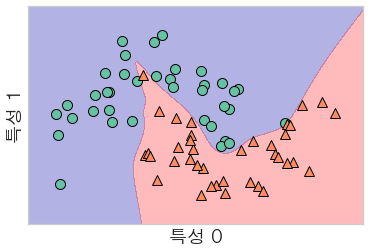

In [180]:
#tanh 활성화 함수가 적용된 10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [181]:
#리지회귀와 선형 분류기에서 한 것처럼 L2페널티를 사용해 가중치를 0에 가깝게 하여 복잡도를 제어할수있음
#MLPVClassifier에서 역할을 하는 매개변수는 alpha이고 기본값은 매우 낮게 설정되있다
#two_moons 데이터셋 유닛이 각각 10개와 100개의 은닉층 2개를 사용시 다른 alpha값이 미치는 영향을 보자

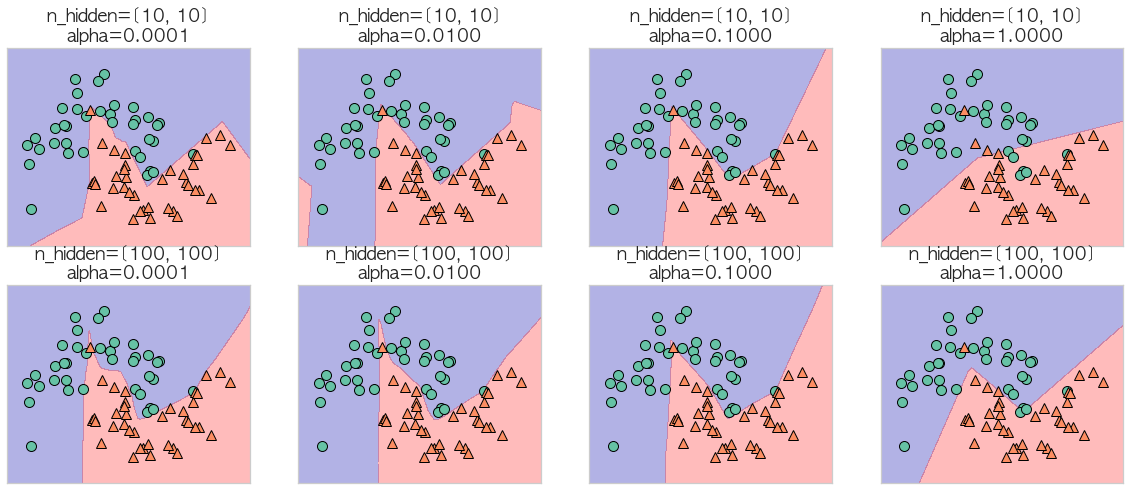

In [182]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [183]:
#신경망을 제어하는 방법은 많이 있다. 은닉층의 수, 은닉층의 유닛 개수, 규제(alpha), 등등,, 
#신경망에서 학습시작전에 가중치를 무작위로 설정하기에 무작위한 초기화가 학습에 영향을 끼침
#따라서 같은 매개변수를 사용하더라도 초기값이 다르면 모델이 많이 달라질수 있음
#신경망이 크고 복잡도도 적절하면 이런 점이 정확도에 미치는 영향이 크다
#다음은 같은 매개변수이지만 초기화를 다르게 하여 만든모델이다

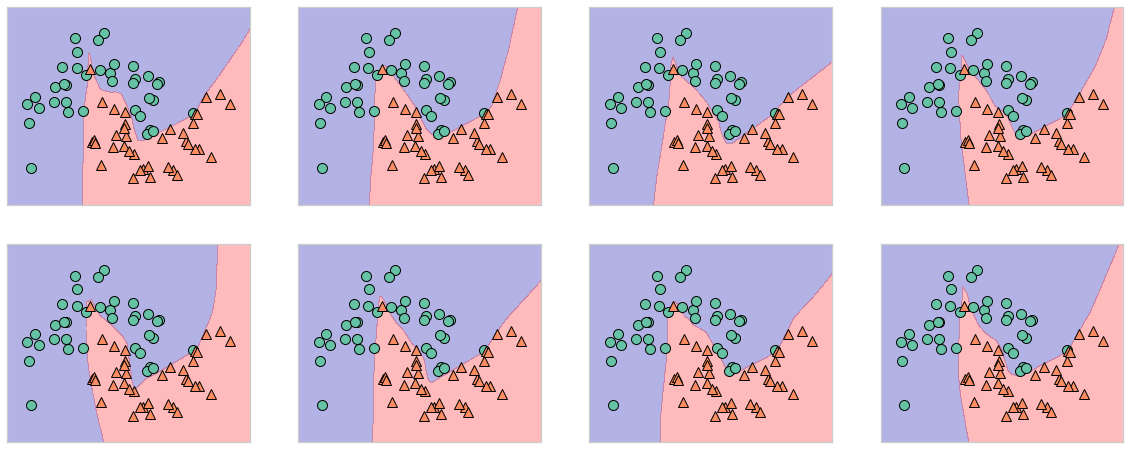

In [184]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [185]:
#유방암 데이터셋에 MLPClassifier를 적용
print("유방암 데이터의 특성별 최대값", cancer.data.max(axis = 0))

유방암 데이터의 특성별 최대값 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state= 0)

mlp = MLPClassifier(random_state= 42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도", round(mlp.score(X_train, y_train),2))
print("테스트 세트 정확도", round(mlp.score(X_test, y_test),2))

훈련 세트 정확도 0.94
테스트 세트 정확도 0.92


In [187]:
#MLP의 정확도는 꽤 높지만 다른 모델만큼은 아니다
#신경망도 SVC예제처럼 특성을 평균 0, 분산 1이 되도록 변경하는 것이 좋음(나중에 자동으로 처리해주는 것 배움)

In [188]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train
 
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [190]:
#최대반복횟수에 도달했다는 경고가 출력.
#위 경고가 나오면 반복횟수를 늘려야함

In [191]:
mlp = MLPClassifier(max_iter = 1000,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [192]:
#반복 횟수를 늘려서 훈련 세트와 테스트 세트의 성능을 올렸다.
#다음으로 일반화 성능을 더 올리기위해 모델의 복잡도를 낮춰보자
#가중치를 더 강하게 규제하도록 0.0001 에서 1까지 증가시켜보자

In [195]:
mlp = MLPClassifier(max_iter = 1000,  alpha = 1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [196]:
#지금까지의 최고의 모델이다.
#신경망이 어떻게 학습하는지 분석힐 수 있지만 선형모델이나 트리모델보다는 훨씬 까다롭다
#모델의 가중치를 확인해보면 무엇이 학습되었는지를 확인할 수 있다.

#다음은 유방암 데이터셋으로 학습시킨 신경망의 첫 번쨰 층의 가중치 히트맵이다

/var/folders/q7/nnz4wymd09q351wdsj2mkysc0000gn/T/ipykernel_1601/2429695605.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


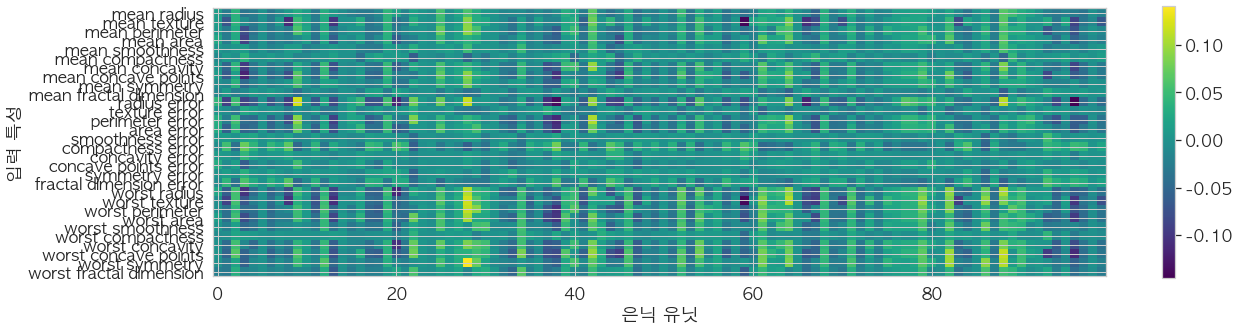

In [203]:
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

In [204]:
#모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론할 수 있다
#MLPClassifier와 MLPRegressor는 일반적인 신경망 구조를 위한 손쉬운 인터페이스를 제공하지만 전체 신경망 종류의 일부만 만들 수 있음

장단점과 매개변수

In [205]:
#충분란 연산시간과 데이타를 주고 매개변수를 세심하게 조정하면 신경망은 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 낸다
#하지만 신경망은 종종 학습시간이 오래걸리며 데이터 전처리에 주의해야한다

신경망의 복잡도 추정

In [206]:
#신경망에서 중요한 매개변수는 은닉층의 갯수와 각 은닉층의 유닛이다
#신경망의 모댈 복잡도에 도움이 될만학 측정치는 학습된 가중치 또는 계수의 수이다
#신경망의 매개변수를 조정하는 일반적인 방법은 먼저 충분히 과대적합되어서 문제를 해결할 만한 큰 모델을 만든후
#훈련데이터가 충분히 학습될 수 있다고 생각할떄 신경망 구조를 줄이거나 alpha값을 증가시켜 일반화 성능을 향상


### 2.4  분류 예측의 불확실성 추정

In [208]:
#scikit-learn에서 많이 사용하는 인터페이스중 하나는 분류기에 예측의 불확실성을 추정할 수 있는 기능이다
#불확실성을 예측할 수 있는 함수는 decision_function과 predict_proba 이다
#다음은 GradientBoostingClassifier 분류기의 decision_function과 predict_proba 가 어떤역할을 하는지 살펴보지

In [213]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

#예제를 위해 클래스의 이름을 "blue"와 "red" 로 바꿈
y_named = np.array(['blue', "red"])[y]

#여러개의 배열을 한번에 train_test_split에 넣을 수 있다
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

#그레디언트 부스팅 모델을 만듬
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)